This file is used to calulate the sensitivity and specificity. 

# 新段落

In [ ]:
#Libraries in use
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import openpyxl
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
# click the URL and paste the obtained code into the bar and click the Enter key
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read in file from drive
annotaitedResults = pd.read_excel('/content/drive/MyDrive/ActiveLearningStigma/AnnotatedResult.xlsx',)
annotaitedResults

,Index,id,author,created_utc,score,num_comments,url,title,selftext,Attempt Prediction: SVCPoly,Attempt Prediction: SVCLinear,Attempt Prediction: RandomForest,Attempt Prediction: DecisionTree,Attempt Prediction: SGD,Outcomes - Self-Harm/Suicide Attempts Sentences,Outcomes - Self-Harm/Suicide Attempts,Planning Prediction: SVCLinear,Planning Prediction: SVCPoly,Planning Prediction: Logistic,Planning Prediction: DecisionTree,Planning Prediction: SGD,Outcomes - Ideation/Planning Sentences,Outcomes - Ideation/Planning
0,690.0,bie7h9,nobodyismename,2019-04-28 14:19:32,4.0,9.0,https://www.reddit.com/r/SuicideWatch/comments...,"If there's one thing that I know I want, is th...","First of all, thank you for reading this.\n\nI...",0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,"If there's one thing that I know I want, is th...",1.0
1,691.0,bie60j,OtherwiseThanks,2019-04-28 14:15:52,16.0,16.0,https://www.reddit.com/r/SuicideWatch/comments...,"Never experienced love, can't take it anymore","I am almost 30. 29, to be precise. I am what t...",0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,"Never experienced love, can't take it anymore ...",1.0
2,692.0,bie5tp,DirtyDan0102030,2019-04-28 14:15:24,2.0,3.0,https://www.reddit.com/r/SuicideWatch/comments...,I need help,The girl I’ve liked for 3 years told me that i...,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,I need help The girl I’ve liked for 3 years to...,1.0
3,693.0,bie49y,What_I_do_45,2019-04-28 14:11:27,4.0,14.0,https://www.reddit.com/r/SuicideWatch/comments...,Nothing to look forward to,This life is not for me. No life is for me. I'...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,Nothing to look forward to This life is not fo...,1.0
4,694.0,bie1d5,HopefulLotus,2019-04-28 14:03:45,1.0,1.0,https://www.reddit.com/r/SuicideWatch/comments...,Finals are around the corner,I’m gonna fail orgo II for the second time and...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,NaN,b7w8cy,jacketslut322,2019-03-31 22:35:23,2.0,3.0,https://www.reddit.com/r/SuicideWatch/comments...,i've been making some of my worst decisions,I have really bad hardcore depression and anxi...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
406,NaN,b7w7rs,cyborg-catgirl,2019-03-31 22:33:48,1.0,2.0,https://www.reddit.com/r/SuicideWatch/comments...,"Hah, my life is cursed.","It's weird looking at my life, looking at how ...",0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,"Hah, my life is cursed. It's weird looking at ...",1.0
407,NaN,b7w5em,ed8907,2019-03-31 22:27:26,23.0,6.0,https://www.reddit.com/r/SuicideWatch/comments...,Angel of Death.,**Angel of Death**. I know you're here because...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,Angel of Death. **Angel of Death**. I know you...,1.0
408,NaN,b7w5c7,Hyppocritamus,2019-03-31 22:27:13,0.0,20.0,https://www.reddit.com/r/SuicideWatch/comments...,I cheated on my wife.,"She wants a divorce, and I'm not going to begr...",0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,"I cheated on my wife. She wants a divorce, and...",1.0


In [ ]:
#Exract neccary data
df = annotaitedResults.iloc[: ,9:23].copy() 
df.drop(['Outcomes - Self-Harm/Suicide Attempts Sentences', 'Outcomes - Ideation/Planning Sentences'], axis=1)

,Attempt Prediction: SVCPoly,Attempt Prediction: SVCLinear,Attempt Prediction: RandomForest,Attempt Prediction: DecisionTree,Attempt Prediction: SGD,Outcomes - Self-Harm/Suicide Attempts,Planning Prediction: SVCLinear,Planning Prediction: SVCPoly,Planning Prediction: Logistic,Planning Prediction: DecisionTree,Planning Prediction: SGD,Outcomes - Ideation/Planning
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
408,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


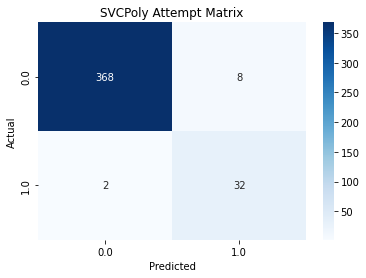

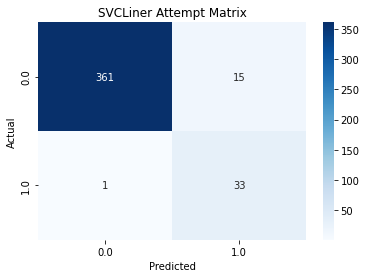

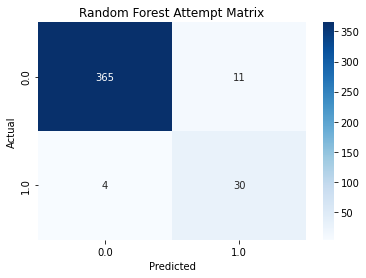

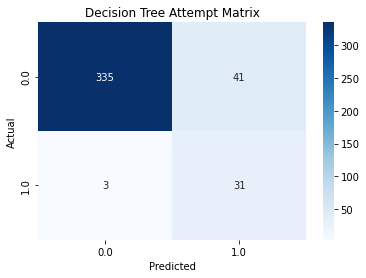

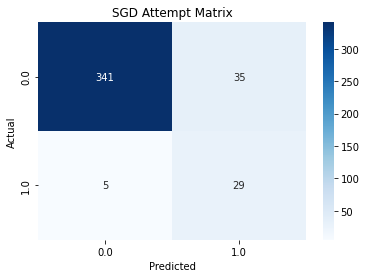

In [ ]:
#Self-Harm/Suicide Attempts confusion matrixes 
svcConfusionMatrix = pd.crosstab(df['Outcomes - Self-Harm/Suicide Attempts'], df['Attempt Prediction: SVCPoly'], rownames=['Actual'], colnames=['Predicted'])
linerConfusionMatrix = pd.crosstab(df['Outcomes - Self-Harm/Suicide Attempts'], df['Attempt Prediction: SVCLinear'], rownames=['Actual'], colnames=['Predicted'])
randomForestConfusionMatrix = pd.crosstab(df['Outcomes - Self-Harm/Suicide Attempts'], df['Attempt Prediction: RandomForest'], rownames=['Actual'], colnames=['Predicted'])
decisionTreeConfusionMatrix = pd.crosstab(df['Outcomes - Self-Harm/Suicide Attempts'], df['Attempt Prediction: DecisionTree'], rownames=['Actual'], colnames=['Predicted'])
sgdConfusionMatrix = pd.crosstab(df['Outcomes - Self-Harm/Suicide Attempts'], df['Attempt Prediction: SGD'], rownames=['Actual'], colnames=['Predicted'])
attemptsMatrixs = [svcConfusionMatrix,linerConfusionMatrix,randomForestConfusionMatrix,decisionTreeConfusionMatrix,sgdConfusionMatrix]
ax = plt.axes()
sn.heatmap(svcConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('SVCPoly Attempt Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(linerConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('SVCLiner Attempt Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(randomForestConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('Random Forest Attempt Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(decisionTreeConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('Decision Tree Attempt Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(sgdConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('SGD Attempt Matrix')
plt.show()

In [ ]:
for matrix in attemptsMatrixs:
  
  TP=matrix.iloc[0,0]
  FP=matrix.iloc[0,1]
  FN=matrix.iloc[1,0]
  TN=matrix.iloc[1,1]
  total2 = TP+FP+FN+TN

#####from confusion matrix calculate accuracy
  accuracy1=((TP+TN)/total2)*100
  print ('Accuracy : ', accuracy1)

  sensitivity1 = (TP/(TP+FP))*100
  print('Sensitivity : ', sensitivity1 )
  specificity1 = (TN/(FN+TN))*100
  print('Specificity : ', specificity1)
  print('')

Accuracy :  97.5609756097561
Sensitivity :  97.87234042553192
Specificity :  94.11764705882352

Accuracy :  96.09756097560975
Sensitivity :  96.01063829787235
Specificity :  97.05882352941177

Accuracy :  96.34146341463415
Sensitivity :  97.07446808510637
Specificity :  88.23529411764706

Accuracy :  89.26829268292683
Sensitivity :  89.09574468085107
Specificity :  91.17647058823529

Accuracy :  90.2439024390244
Sensitivity :  90.69148936170212
Specificity :  85.29411764705883



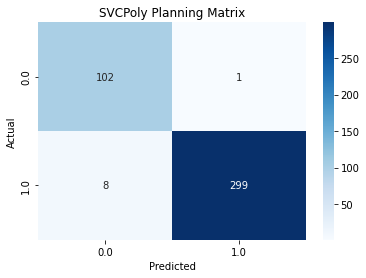

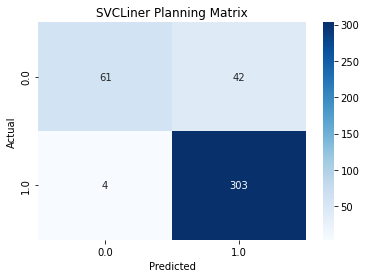

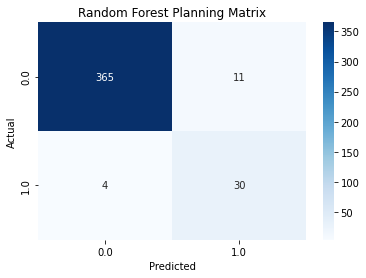

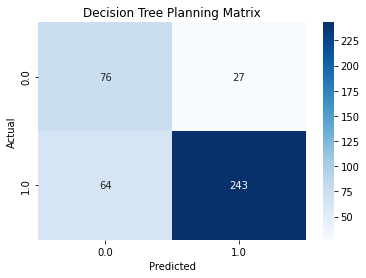

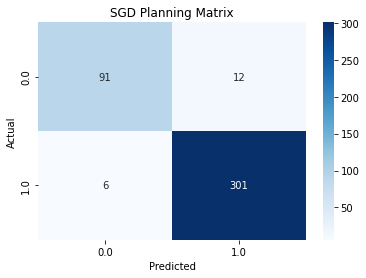

In [ ]:
#Ideation/Planning confusion matrixes 
svcConfusionMatrix = pd.crosstab(df['Outcomes - Ideation/Planning'], df['Planning Prediction: SVCPoly'], rownames=['Actual'], colnames=['Predicted'])
linerConfusionMatrix = pd.crosstab(df['Outcomes - Ideation/Planning'], df['Planning Prediction: SVCLinear'], rownames=['Actual'], colnames=['Predicted'])
logisticConfusionMatrix = pd.crosstab(df['Outcomes - Ideation/Planning'], df['Planning Prediction: Logistic'], rownames=['Actual'], colnames=['Predicted'])
decisionTreeConfusionMatrix = pd.crosstab(df['Outcomes - Ideation/Planning'], df['Planning Prediction: DecisionTree'], rownames=['Actual'], colnames=['Predicted'])
sgdConfusionMatrix = pd.crosstab(df['Outcomes - Ideation/Planning'], df['Planning Prediction: SGD'], rownames=['Actual'], colnames=['Predicted'])
planningMatrixs = [svcConfusionMatrix,linerConfusionMatrix,logisticConfusionMatrix,decisionTreeConfusionMatrix,sgdConfusionMatrix]
ax = plt.axes()
sn.heatmap(svcConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('SVCPoly Planning Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(linerConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('SVCLiner Planning Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(randomForestConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('Random Forest Planning Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(decisionTreeConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('Decision Tree Planning Matrix')
plt.show()
ax = plt.axes()
sn.heatmap(sgdConfusionMatrix, annot=True,fmt='d',cmap='Blues')
ax.set_title('SGD Planning Matrix')
plt.show()

In [ ]:
for matrix in planningMatrixs:
  
  TP=matrix.iloc[0,0]
  FP=matrix.iloc[0,1]
  FN=matrix.iloc[1,0]
  TN=matrix.iloc[1,1]
  total2 = TP+FP+FN+TN

#####from confusion matrix calculate accuracy
  accuracy1=((TP+TN)/total2)*100
  print ('Accuracy : ', accuracy1)

  sensitivity1 = (TP/(TP+FP))*100
  print('Sensitivity : ', sensitivity1 )
  specificity1 = (TN/(FN+TN))*100
  print('Specificity : ', specificity1)
  print('')


Accuracy :  97.80487804878048
Sensitivity :  99.02912621359224
Specificity :  97.39413680781759

Accuracy :  88.78048780487805
Sensitivity :  59.22330097087378
Specificity :  98.69706840390879

Accuracy :  92.19512195121952
Sensitivity :  96.11650485436894
Specificity :  90.87947882736157

Accuracy :  77.8048780487805
Sensitivity :  73.7864077669903
Specificity :  79.15309446254072

Accuracy :  95.60975609756098
Sensitivity :  88.3495145631068
Specificity :  98.0456026058632

